### Process of building Deep Neural Network:
- Import Dataset
- Load Dataset into **Train and Test**.
- **Normalize** Train and Test datasets.
- **Construct** the Model(with layers).
- **Configure** the Model for **Training**.
- **Train the Model** by Fitting Training data with appropriate labels.
- **Evaluate loss and accuracy** on **validation dataset**.
- Save the model(if satisfied with accuracy)
- Re-instatiate the saved model.
- **Predictions on Test/Real-life dataset**.

In [2]:
#Import required libraries:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### We are going to build Deep Learning Model using 2 approaches and compare the accuracy of both the models with respect to each other:
- Approach:1--> Using traditional approach i.e. not using Convolution and Pooling layers
- Approach:2--> Using Convolution and Pooling layers

### Traditional approach:

In [3]:
#Import the dataset:
fashion_mnist = tf.keras.datasets.fashion_mnist

#Load the dataset:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [4]:
#Check Train and Test datasets:
#View shapes:
print("[SHAPE-TRAIN DATASET]::",train_images.shape)
print("[SHAPE-TEST DATASET]::",test_images.shape)

[SHAPE-TRAIN DATASET]:: (60000, 28, 28)
[SHAPE-TEST DATASET]:: (10000, 28, 28)


In [5]:
plt.cm.get_cmap

<function matplotlib.cm.get_cmap(name=None, lut=None)>

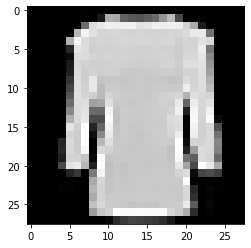

In [6]:
#View some of the dataset:
'''
# cmap='gray'::Image display in "Gray-Scale"
# cmap='gray_r'::Image display in "Inverse Gray-Scale"
    # Gray-Scale--> Shades 
    # Inverse Gray-Scale-->
'''
plt.imshow(train_images[55000],cmap='gray')
plt.show()

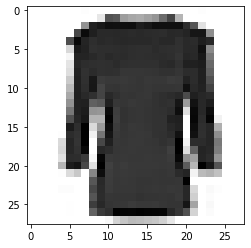

In [7]:
#While displaying the image as binary--Thresholding operation perform.
plt.imshow(train_images[55000],cmap=plt.cm.binary)
plt.show()

In [8]:
#The following code will load an image from a file image.png and will display it as grayscale:
'''
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

fname = 'image.png'
image = Image.open(fname).convert("L")
arr = np.asarray(image)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()
'''

'\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom PIL import Image\n\nfname = \'image.png\'\nimage = Image.open(fname).convert("L")\narr = np.asarray(image)\nplt.imshow(arr, cmap=\'gray\', vmin=0, vmax=255)\nplt.show()\n'

### Normalize the datasets:

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### Construct the model:

In [10]:
model_traditional = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                               tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                               tf.keras.layers.Dense(256,activation=tf.nn.relu),
                                               tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### View Model Summary:

In [11]:
model_traditional.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


### Configure the Model for Training:

In [12]:
model_traditional.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy,
                         metrics=['accuracy'])

### Fit the Training data with Training labels and specify number of epochs for training:

In [13]:
model_traditional.fit(train_images,train_labels,epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 8s 141us/sample - loss: 0.4763 - acc: 0.8298
Epoch 2/3
60000/60000 [==============================] - 7s 111us/sample - loss: 0.3615 - acc: 0.8674
Epoch 3/3
60000/60000 [==============================] - 7s 115us/sample - loss: 0.3250 - acc: 0.8795


### Evaluate Model's accuracy on Validation Dataset:

In [14]:
val_loss,val_acc = model_traditional.evaluate(test_images,test_labels)
print("[LOSS-VALIDATION]::",val_loss)
print("[ACCURACY-VALIDATION]::",val_acc)

10000/10000 [==============================] - 1s 77us/sample - loss: 0.3849 - acc: 0.8651
[LOSS-VALIDATION]:: 0.38493964943885806
[ACCURACY-VALIDATION]:: 0.8651


Our accuracy is about **87% on Training Dataset** and the same(not usually happen) **87% on validation dataset**. Not Bad..! But we need to think ahead and rethink how do we make this accuracy even better? One way to use **"Convolutions"**. In short, Convolution operation **narrow down** the contents of the image to focous on specific and distinct details.

Feature Extraction::This is perfect for Computer Vision,because it's features that can highlights and distingquish **one object from another** and then the amount of information needed is much less for training,because we'll just train on Highlighted features. And this is the concept behind **Convolutional Neural Networks**.

The Convolution layers are before Dense layers with the purpose of information going to the dense layers is more focussed, and possibly more accurate(fetaures)

### Convolutional Neural Network:

In [15]:
#Import tensorflow module:
import tensorflow as tf
#Print its vesion:
print(tf.__version__)

1.15.2


In [16]:
#Import Fashion MNIST dataset and load it into train and test dataset:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [17]:
#Check the shape of training and testing dataset:
print("[SHAPE->TRAINING DATASET]::",train_images.shape)
print("[SHAPE->TESTING DATASET]::",test_images.shape)

[SHAPE->TRAINING DATASET]:: (60000, 28, 28)
[SHAPE->TESTING DATASET]:: (10000, 28, 28)


In [18]:
#Reshape the dataset--> That's because the first convolution layer expects a single tensor containing everything, 
#so instead of (60,000 28x28)(color channel is not specified) items in a list, 
#we have a single 4D list that is (60,000x28x28x1)--Added color channel as 1-GrayScale image,3-Color image, 
#and the same for the test images and then normalize the datasets:
train_images = train_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)

In [19]:
#Check shape again:
print("[SHAPE->TRAINING DATASET]::",train_images.shape)
print("[SHAPE->TESTING DATASET]::",test_images.shape)

[SHAPE->TRAINING DATASET]:: (60000, 28, 28, 1)
[SHAPE->TESTING DATASET]:: (10000, 28, 28, 1)


In [20]:
#Normalize the datasets as usual method:
train_images = train_images / 255.0
test_images = test_images / 255.0

#### Adding Convolution Layers, the Parameters are:
- The number of Convolutions(feature maps) we want to generate. Purely arbitrary, but good to start with something in the order of 32
- The size of Convolution Kernel. In our case,we took 3x3 grid.
- The activation function. In our case,we used relu.
- The shape of the input data.
- Next, the Convolution layer follows with a **MaxPooling layer** which use to **compress the image**, but **maintaining the content of the features** that were highlighted or we can say extracted by the convlution layer.
- We are going to add 2 Convolution Layers and MaxPooling layer follows by each Convolution Layer.
- View Model summary to see the size and shape of the network.

In [21]:
#We are going to create same 'Sequential Model' as previous but with additional 'Convolution' and 'Pooling' layers:
#We are going to add layers in array format::
# Model type:: Sequential
# Type of layers:: 2--> Convolutions 2-->Pooling 1-->Flatten 2-->Dense 1-->Output
model_new = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation=tf.nn.relu,input_shape=(28,28,1)),
                                       tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                       tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu),
                                       tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                       tf.keras.layers.Flatten(),
                                       tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                       tf.keras.layers.Dense(256,activation=tf.nn.relu),
                                       tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [22]:
#Print Model Summary:
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_4 (Dense)              (None, 256)              

### Configure the model for training:

In [23]:
#Compile the model and pass 3 parameters--:
    # Optimizer 
    # loss
    # metrics to measure 
model_new.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

### Fit the model with Training data and note the accuracy:

In [24]:
model_new.fit(train_images,train_labels,epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 73s 1ms/sample - loss: 0.4618 - acc: 0.83130s - loss: 0.4624 - acc: 0.8
Epoch 2/3
60000/60000 [==============================] - 72s 1ms/sample - loss: 0.2988 - acc: 0.8894
Epoch 3/3
60000/60000 [==============================] - 77s 1ms/sample - loss: 0.2497 - acc: 0.9067


- **Conclusion**:
    - The Training **accuracy is significatly increase** compared with our first model(without convolution layers).
    - We can increase more epochs as loss is seems decreasing.

In [25]:
#Let's evaluate model on Validation dataset and note test loss and test accuracy:
test_loss,test_accuracy = model_new.evaluate(test_images,test_labels)
print("[TEST LOSS]::",test_loss)
print("[TEST ACCURACY]::",test_accuracy)

10000/10000 [==============================] - 4s 396us/sample - loss: 0.2622 - acc: 0.9040
[TEST LOSS]:: 0.2622016505479813
[TEST ACCURACY]:: 0.904


### Visualizing the Convolutions and Pooling operations:

In [26]:
print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


In [27]:
#Import plotting library:
import matplotlib.pyplot as plt

In [28]:
(X_train,Y_train),(X_test,Y_test)  = fashion_mnist.load_data()

In [30]:
model_new.layers

In [31]:
layer_outputs = []
for layer in model_new.layers:
    layer_outputs.append(layer.output)
    print(layer_outputs)

[<tf.Tensor 'conv2d/Relu:0' shape=(?, 26, 26, 32) dtype=float32>]
[<tf.Tensor 'conv2d/Relu:0' shape=(?, 26, 26, 32) dtype=float32>, <tf.Tensor 'max_pooling2d/MaxPool:0' shape=(?, 13, 13, 32) dtype=float32>]
[<tf.Tensor 'conv2d/Relu:0' shape=(?, 26, 26, 32) dtype=float32>, <tf.Tensor 'max_pooling2d/MaxPool:0' shape=(?, 13, 13, 32) dtype=float32>, <tf.Tensor 'conv2d_1/Relu:0' shape=(?, 11, 11, 64) dtype=float32>]
[<tf.Tensor 'conv2d/Relu:0' shape=(?, 26, 26, 32) dtype=float32>, <tf.Tensor 'max_pooling2d/MaxPool:0' shape=(?, 13, 13, 32) dtype=float32>, <tf.Tensor 'conv2d_1/Relu:0' shape=(?, 11, 11, 64) dtype=float32>, <tf.Tensor 'max_pooling2d_1/MaxPool:0' shape=(?, 5, 5, 64) dtype=float32>]
[<tf.Tensor 'conv2d/Relu:0' shape=(?, 26, 26, 32) dtype=float32>, <tf.Tensor 'max_pooling2d/MaxPool:0' shape=(?, 13, 13, 32) dtype=float32>, <tf.Tensor 'conv2d_1/Relu:0' shape=(?, 11, 11, 64) dtype=float32>, <tf.Tensor 'max_pooling2d_1/MaxPool:0' shape=(?, 5, 5, 64) dtype=float32>, <tf.Tensor 'flatten

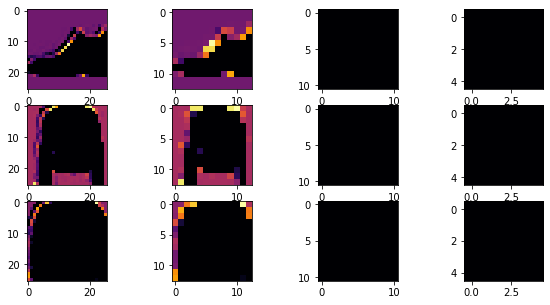

In [32]:
fig,axarr = plt.subplots(3,4,figsize=(10,5))
FIRST_IMAGE=0
SECOND_IMAGE=10
THIRD_IMAGE=20
CONVOLUTION_NUMBER = 1

from tensorflow.keras import models

layer_outputs = []
for layer in model_new.layers:
    layer_outputs.append(layer.output)
    
activation_model = tf.keras.models.Model(inputs = model_new.input, outputs = layer_outputs)

for x in range(0,4):
    f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1,28,28,1))[x]
    axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER],cmap='inferno')
    axarr[0,x].grid(False)
    
    f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[x]
    axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER],cmap='inferno')
    axarr[1,x].grid(False)
    
    f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1,28,28,1))[x]
    axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER],cmap='inferno')
    axarr[2,x].grid(False)

Text(0.5, 1.0, 'IMAGE-AT INDEX 20')

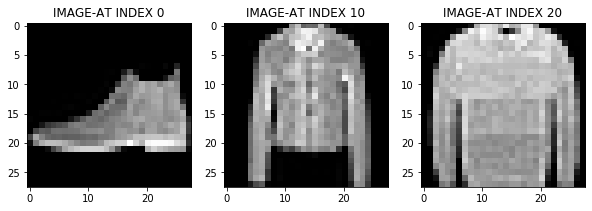

In [33]:
figure,axes = plt.subplots(1,3,figsize=(10,5))
axes[0].imshow(X_test[FIRST_IMAGE],cmap='gray')
axes[0].set_title("IMAGE-AT INDEX {}".format(FIRST_IMAGE))
axes[1].imshow(X_test[SECOND_IMAGE],cmap='gray')
axes[1].set_title("IMAGE-AT INDEX {}".format(SECOND_IMAGE))
axes[2].imshow(X_test[THIRD_IMAGE],cmap='gray')
axes[2].set_title("IMAGE-AT INDEX {}".format(THIRD_IMAGE))

- **EXPERIMENTS-**
    - Editing the Convolutions(the number of filters). Change the standard 32s to either 16 or 64. Measure its impact on accuracy and on training time.
    - Removation of final Convolution layer. Measure its impact on accuracy and on training time?
    - Effect of adding more Convolution layers? Measure its impact.
    - **Removation all Convolutions without the the first one. Measure its impact.**
    - Implementation of callback to check on the loss function and to stop training once it hit a certain amount of accuracy.

### EXPERIMENT :: 1-->
   - Objective:: 
       - Editing the **Number of Convolutions(number of filters)** and note its impact on accuracy and training time.
   
   _[NOTE:We are keeping rest of the parameters(**number of neurons in Dense layers,activation function in both Convolution and Dense layers**) same to measure extact impact of Change in Filter numbers on Accuracy and Training Time]_.

In [38]:
#STEP-1--> Construct the Model::
#Create an instance of class 'Sequential'(it basically tells that our Model consist stack of layers):
model_exp_1 = tf.keras.models.Sequential()

#Add layers to model:
#Specifiy 8 filters of 3x3 at 1st layer-->
model_exp_1.add(tf.keras.layers.Conv2D(8,(3,3),activation=tf.nn.relu,input_shape=(28,28,1)))
model_exp_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

#Specifiy 16 filters of 3x3 at 2nd layer-->
model_exp_1.add(tf.keras.layers.Conv2D(16,(3,3),activation=tf.nn.relu))
model_exp_1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

#Input Flatten layer for gievn to Dense Layer-->
model_exp_1.add(tf.keras.layers.Flatten())

#Add 2 Dense layers-->
model_exp_1.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model_exp_1.add(tf.keras.layers.Dense(256,activation=tf.nn.relu))

#Add Output layers-->
model_exp_1.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [39]:
#Print Model summary:
model_exp_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               51328     
_________________________________________________________________
dense_7 (Dense)              (None, 256)              

In [40]:
#Configuare/Compile the model for training:
model_exp_1.compile(optimizer='adam',
                   loss=tf.keras.losses.sparse_categorical_crossentropy,
                   metrics=['accuracy'])

In [43]:
#Fit the model with Training data and specify number of epochs:
model_exp_1.fit(train_images,train_labels,epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 30s 508us/sample - loss: 0.5152 - acc: 0.8079 - lo
Epoch 2/3
60000/60000 [==============================] - 31s 510us/sample - loss: 0.3490 - acc: 0.8721
Epoch 3/3
60000/60000 [==============================] - 35s 576us/sample - loss: 0.3003 - acc: 0.8889


In [44]:
#Let's evaluate model on Validation dataset and note test loss and test accuracy:
test_loss,test_accuracy = model_exp_1.evaluate(test_images,test_labels)
print("[TEST LOSS]::",test_loss)
print("[TEST ACCURACY]::",test_accuracy)

10000/10000 [==============================] - 2s 219us/sample - loss: 0.3173 - acc: 0.8838
[TEST LOSS]:: 0.3173277768373489
[TEST ACCURACY]:: 0.8838


**Results::**
- Observations-->
    - Total Training time required(in case of 32 filters in first Convolution layer and 64 filters in second Convolution layer):: 222 Seconds
    - Accuracy:: 90%

    - Total Training time required(in case of 16 filters in first Convolution layer and 32 filters in second Convolution layer):: 96 Seconds
    - Accuracy:: 88%

**Conclusion::**
- By observing the above result we can say that if we reduce the number of filters in first and second convolution layers the training time gets decrease but accuracy is 88%.
- And if we increase the number of filters in first and second convolution layers the training time gets increase and we receive the training and testing accuracy around 90% which is good to consider.

**Sol::**
- In the case of more number of filters in 1st and 2nd case we can use **GPU** support to reduce the training time or I can say to perform training faster. But we need to go with the first choice i.e.more number of filters in 1st and 2nd layers.

### EXPERIMENT :: 2-->
Objective:: 
- Removation of final Convolution layer. 
- Measurement of its impact on accuracy and on training time.

[NOTE:We are keeping rest of the parameters(number of neurons in Dense layers,activation function in both Convolution and Dense layers) same to measure extact impact of Change in Filter numbers on Accuracy and Training Time].

In [45]:
#STEP-1--> Construct the Model::
#Create an instance of class 'Sequential'(it basically tells that our Model consist stack of layers):
model_exp_2 = tf.keras.models.Sequential()

#Add layers to model:
#Specifiy 32 filters of 3x3 at 1st layer-->
model_exp_2.add(tf.keras.layers.Conv2D(32,(3,3),activation=tf.nn.relu,input_shape=(28,28,1)))
model_exp_2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

#Specifiy 16 filters of 3x3 at 2nd layer-->
#model_exp_1.add(tf.keras.layers.Conv2D(16,(3,3),activation=tf.nn.relu))
#[NOTE::We are keeping the pooling layer as it is-->]
model_exp_2.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

#Input Flatten layer for gievn to Dense Layer-->
model_exp_2.add(tf.keras.layers.Flatten())

#Add 2 Dense layers-->
model_exp_2.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model_exp_2.add(tf.keras.layers.Dense(256,activation=tf.nn.relu))

#Add Output layers-->
model_exp_2.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [46]:
#Print Model summary:
model_exp_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               147584    
_________________________________________________________________
dense_10 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [47]:
#Configuare/Compile the model for training:
model_exp_2.compile(optimizer='adam',
                   loss=tf.keras.losses.sparse_categorical_crossentropy,
                   metrics=['accuracy'])

In [48]:
#Fit the model with Training data and specify number of epochs:
model_exp_2.fit(train_images,train_labels,epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 37s 620us/sample - loss: 0.4640 - acc: 0.8277
Epoch 2/3
60000/60000 [==============================] - 36s 605us/sample - loss: 0.3116 - acc: 0.8834
Epoch 3/3
60000/60000 [==============================] - 36s 602us/sample - loss: 0.2741 - acc: 0.8978


In [49]:
#Let's evaluate model on Validation dataset and note test loss and test accuracy:
test_loss,test_accuracy = model_exp_2.evaluate(test_images,test_labels)
print("[TEST LOSS]::",test_loss)
print("[TEST ACCURACY]::",test_accuracy)

10000/10000 [==============================] - 2s 232us/sample - loss: 0.3068 - acc: 0.8814
[TEST LOSS]:: 0.30683049824237824
[TEST ACCURACY]:: 0.8814


**Results::**
- Observations-->
- **Case-1::**
    - Total Training time required(in case of **32 filters in first Convolution layer** and **64 filters in second Convolution layer**):: 222 Seconds
    - Accuracy::
        - Training::90%
        - Testing::90%
- **Case-2::**
    - Total Training time required(in case of **16 filters in first Convolution layer** and **32 filters in second Convolution layer**):: 96 Seconds
    - Accuracy::
        - Training::88%
        - Testing::88%
- **Case-3::**    
    - Total Training time required(by **droping second Convolution layer** but **keeping second Pooling layer** as it is)::109 Seconds 
    - Accuracy::
        - Training::89%
        - Testing::88%

**Conclusion::**
- By observing the above result we can say that if we drop the second covolution layer but keep 2nd Pooling layer as it is we get Training accuracy is 89%(which is slightly less in Case-1) in 109 Seconds.

**Sol::**
- To reduce this training time even further or I can say to perform training more faster we can use **GPU** support.

### EXPERIMENT :: 3-->
- **Objective::** 
    - Effect of adding more Convolution layers. 
    - Measure its impact on Accuracy and Training Time.

_[NOTE:We are keeping rest of the parameters**(number of neurons in Dense layers,activation function in both Convolution and Dense layers)** same to measure extact impact of Change in Filter numbers on Accuracy and Training Time]_.

In [51]:
#STEP-1--> Construct the Model::
#Create an instance of class 'Sequential'(it basically tells that our Model consist stack of layers):
model_exp_3 = tf.keras.models.Sequential()

#Add layers to model:
#Specifiy 16 filters of 3x3 at 1st Convolution layer-->
model_exp_3.add(tf.keras.layers.Conv2D(16,(3,3),activation=tf.nn.relu,input_shape=(28,28,1)))
model_exp_3.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

#Specifiy 32 filters of 3x3 at 2nd Convolution layer-->
model_exp_3.add(tf.keras.layers.Conv2D(32,(3,3),activation=tf.nn.relu))
model_exp_3.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

#Specifiy 64 filters of 3x3 at 3rd Convolution layer-->
model_exp_3.add(tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu))
model_exp_3.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Input Flatten layer for gievn to Dense Layer-->
model_exp_3.add(tf.keras.layers.Flatten())

#Add 2 Dense layers-->
model_exp_3.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model_exp_3.add(tf.keras.layers.Dense(256,activation=tf.nn.relu))

#Add Output layers-->
model_exp_3.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [52]:
#Print Model summary:
model_exp_3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 64)               

In [53]:
#Configuare/Compile the model for training:
model_exp_3.compile(optimizer='adam',
                   loss=tf.keras.losses.sparse_categorical_crossentropy,
                   metrics=['accuracy'])

In [54]:
#Fit the model with Training data and specify number of epochs:
model_exp_3.fit(train_images,train_labels,epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 44s 731us/sample - loss: 0.6210 - acc: 0.7710
Epoch 2/3
60000/60000 [==============================] - 44s 731us/sample - loss: 0.4065 - acc: 0.8518
Epoch 3/3
60000/60000 [==============================] - 44s 729us/sample - loss: 0.3524 - acc: 0.8698


In [55]:
#Let's evaluate model on Validation dataset and note test loss and test accuracy:
test_loss,test_accuracy = model_exp_3.evaluate(test_images,test_labels)
print("[TEST LOSS]::",test_loss)
print("[TEST ACCURACY]::",test_accuracy)

10000/10000 [==============================] - 3s 257us/sample - loss: 0.3903 - acc: 0.8529
[TEST LOSS]:: 0.3902632870674133
[TEST ACCURACY]:: 0.8529


**Results::**
- Observations-->
- **Case-1::**
    - Total Training time required(in case of **32 filters in first Convolution layer** and **64 filters in second Convolution layer**):: 222 Seconds
    - Accuracy::
        - Training::90%
        - Testing::90%
- **Case-2::**
    - Total Training time required(in case of **16 filters in first Convolution layer** and **32 filters in second Convolution layer**):: 96 Seconds
    - Accuracy::
        - Training::88%
        - Testing::88%
- **Case-3::**    
    - Total Training time required(by **droping second Convolution layer** but **keeping second Pooling layer** as it is)::109 Seconds 
    - Accuracy::
        - Training::89%
        - Testing::88%
- **Case-4::**    
    - Total Training time required(by **adding more convolution and pooling layer**)::132 Seconds 
    - Accuracy::
        - Training::86%
        - Testing::85%

**Conclusion::**
- By observing the above result we can say that if we add more convolution as well as pooling layer in our model we get Training accuracy is 86%(which is less in all 3 previous cases) in 132 Seconds.

**Sol::**
- Need to find sweet point.

### EXPERIMENT :: 4-->
Objective:: 
   - Removation of all Convolution layers except 1st one.
   - Measure effect on Accuracy and Training time.

[NOTE:We are keeping rest of the parameters**(number of neurons in Dense layers,activation function in both Convolution and Dense layers)** same to measure extact impact of Change in Filter numbers on Accuracy and Training Time].

### EXPERIMENT :: 5-->
Objective:: 
   - Implementation of CallBack function.
   - Going with Case-1 approach for building the model.

[NOTE:We are keeping rest of the parameters(number of neurons in Dense layers,activation function in both Convolution and Dense layers) same to measure extact impact of Change in Filter numbers on Accuracy and Training Time].

In [76]:
#Implement CallBack:
#Define a class named myCallBack(which is going to derive from superclass "CallBack"):
class myCallBack(tf.keras.callbacks.Callback):
    #Define a function for monitoring accuracy after each epoch end:
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('acc') > 0.91:
            print("\n[MESSAGE]::Reached 91% accuracy so stopped further training!")
            self.model.stop_training = True

#Create an instance of myCallBack class:
call_back = myCallBack()

#Construct the Model:
model_exp_5 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation=tf.nn.relu,input_shape=(28,28,1)),
                                          tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                          tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu),
                                          tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                          tf.keras.layers.Flatten(),
                                          tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                          tf.keras.layers.Dense(256,activation=tf.nn.relu),
                                          tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

In [73]:
#Print Model summary:
model_exp_5.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_25 (Dense)             (None, 256)             

In [78]:
#Configure the model for training:
model_exp_5.compile(optimizer='adam',
                   loss=tf.keras.losses.sparse_categorical_crossentropy,
                   metrics=['accuracy'])

In [79]:
#Fit the model with Training data and specify number of epochs:
model_exp_5.fit(train_images,train_labels,epochs=5,callbacks=[call_back])

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 78s 1ms/sample - loss: 0.4547 - acc: 0.8333
Epoch 2/5
60000/60000 [==============================] - 79s 1ms/sample - loss: 0.2930 - acc: 0.8922
Epoch 3/5
60000/60000 [==============================] - 75s 1ms/sample - loss: 0.2475 - acc: 0.9086
Epoch 4/5
59968/60000 [============================>.] - ETA: 0s - loss: 0.2154 - acc: 0.9196
[MESSAGE]::Reached 91% accuracy so stopped further training!
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.2155 - acc: 0.9196


In [80]:
#Let's evaluate model on Validation dataset and note test loss and test accuracy:
test_loss,test_accuracy = model_exp_5.evaluate(test_images,test_labels)
print("[TEST LOSS]::",test_loss)
print("[TEST ACCURACY]::",test_accuracy)

10000/10000 [==============================] - 5s 452us/sample - loss: 0.2610 - acc: 0.9037
[TEST LOSS]:: 0.2610350433886051
[TEST ACCURACY]:: 0.9037


### !----------------JUST EXPERIMENT---------------------!

In [89]:
tf.__version__

'1.15.2'

In [88]:
import tensorflow as tf 
def train_set():
    class MyCallBacks(tf.keras.callbacks.Callback):
        def on_epoch_end(self,epoch,logs={}):
            if(logs.get('acc') > 0.95):
                print('\n[MESSAGE]::Reached %.2f Accuracy.So,the Model Training has stopped..!'%(logs.get('acc')*100))
                self.model.stop_training=True
    callbacks=MyCallBacks()
    mnist_dataset=tf.keras.datasets.mnist 
    (x_train,y_train),(x_test,y_test)=mnist_dataset.load_data()
    x_train=x_train/255.0
    x_test=x_test/255.0
    classifier=tf.keras.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(512,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
                                    ])
    classifier.compile(
                        optimizer='sgd',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy']
                       )    
    history=classifier.fit(x_train,y_train,epochs=10,callbacks=[callbacks])
    return history.history,history.epoch,history.history['acc'][-1]
#Call the function::
training_history,required_epochs,accuracy_threshold = train_set()
print("\n[TRAINING HISTORY]-->\n::",training_history)
print("\n[REQUIRED EPOCHS TO REACH DESIRED ACCURACY]-->\n::",required_epochs)
print("\n[ACCURACY THRESHOLD AT LAST EPOCH]-->\n::",accuracy_threshold)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 226us/sample - loss: 0.6002 - acc: 0.8545
Epoch 2/10
60000/60000 [==============================] - 13s 219us/sample - loss: 0.3215 - acc: 0.9106
Epoch 3/10
60000/60000 [==============================] - 13s 221us/sample - loss: 0.2739 - acc: 0.9236
Epoch 4/10
60000/60000 [==============================] - 13s 221us/sample - loss: 0.2437 - acc: 0.9326
Epoch 5/10
60000/60000 [==============================] - 14s 225us/sample - loss: 0.2207 - acc: 0.9387
Epoch 6/10
60000/60000 [==============================] - 13s 222us/sample - loss: 0.2021 - acc: 0.9438
Epoch 7/10
60000/60000 [==============================] - 13s 219us/sample - loss: 0.1861 - acc: 0.9483
Epoch 8/10
59840/60000 [============================>.] - ETA: 0s - loss: 0.1729 - acc: 0.9519
[MESSAGE]::Reached 95.19 Accuracy.So,the Model Training has stopped..!
60000/60000 [==============================] - 13s 218us/sample - loss: 0.1728 - ac

### ! END !